In [2]:
from time import time
import numpy as np
import keras.backend as K
from tensorflow.keras.layers import Layer, InputSpec
from keras.models import Model
from keras.utils.vis_utils import plot_model
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd

from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD
import numpy as np
from random import randint
import os
import matplotlib.pyplot as plt

import tensorflow_addons as tfa
import plotting_funcs as pf
import clustering_model as cm

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

In [3]:
X = np.load('../npy_files/features_All32.npy')
y = np.load('../npy_files/labels_All32.npy')
types = np.load('../npy_files/celltypes_All32.npy')
y_letter = np.array([well[:1] for well in y])
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
labs = le.fit_transform(y)
labs_by_letter = le.fit_transform(y_letter)
print(len(X),len(y))
X_train, y_train = X, labs
X_train.shape

4600 4600


(4600, 32, 5)

In [3]:
# #cut area column
# x_cut = np.delete(X, 2, 2)
# X_train = x_cut.copy()
# X_train.shape

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
X_train.shape[1]

32

In [5]:
X_train = X_train.reshape(X_train.shape[0],int(X_train.shape[1]/4),4,X_train.shape[2])
X_train.shape

(4600, 8, 4, 5)

In [6]:
input_shape = X_train.shape[1:]

print(input_shape)

(8, 4, 5)


In [7]:
#too little params, conv with stride lowers data dimention too much...
cae = cm.ae_conv(input_shape)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1 (Conv2D)              (None, 4, 2, 32)          672       
                                                                 
 conv2 (Conv2D)              (None, 4, 2, 64)          8256      
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 embedding (Dense)           (None, 8)                 4104      
                                                                 
 dense (Dense)               (None, 64)                576       
                                                                 
 reshape (Reshape)           (None, 4, 2, 8)           0         
                                                                 
 deconv2 (Conv2DTranspose)   (None, 4, 2, 32)          1

2022-09-11 12:25:27.674258: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [23]:
epochs = 100
batch_size = 128
cae.compile(optimizer='adam', loss='mse')

cae.fit(X_train, X_train, batch_size=batch_size, epochs=epochs)

Epoch 1/100
36/36 [==============================] - 1s 12ms/step - loss: 0.4063
Epoch 2/100
36/36 [==============================] - 0s 12ms/step - loss: 0.3985
Epoch 3/100
36/36 [==============================] - 0s 13ms/step - loss: 0.3984
Epoch 4/100
36/36 [==============================] - 0s 12ms/step - loss: 0.3982
Epoch 5/100
36/36 [==============================] - 0s 12ms/step - loss: 0.3982
Epoch 6/100
36/36 [==============================] - 1s 17ms/step - loss: 0.3983
Epoch 7/100
36/36 [==============================] - 0s 11ms/step - loss: 0.3980
Epoch 8/100
36/36 [==============================] - 0s 11ms/step - loss: 0.3981
Epoch 9/100
36/36 [==============================] - 0s 11ms/step - loss: 0.3978
Epoch 10/100
36/36 [==============================] - 0s 12ms/step - loss: 0.3981
Epoch 11/100
36/36 [==============================] - 0s 12ms/step - loss: 0.3980
Epoch 12/100
36/36 [==============================] - 0s 11ms/step - loss: 0.3979
Epoch 13/100
36/36 [=====

(10, 8, 4, 5)
1/1 [==============================] - 0s 106ms/step


/Users/amosavni/university/DeepLearningWorkshop/deepcell_mod/DL-WORKSHOP/Clustering/plotting_funcs.py:84: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


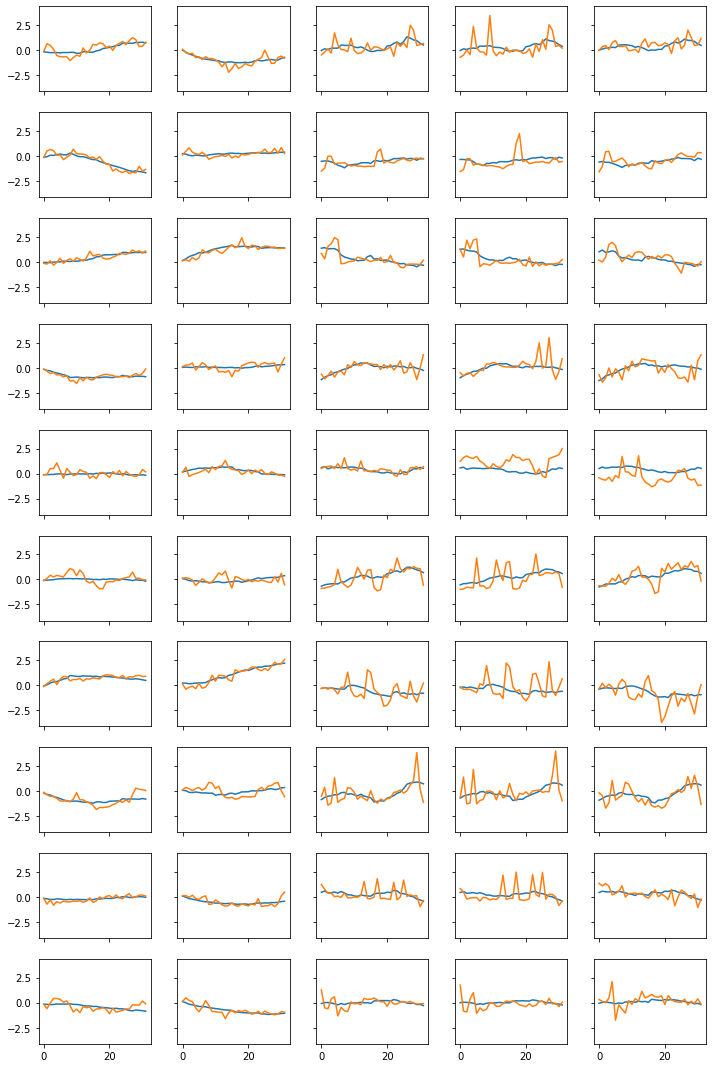

In [24]:
size = 10
rand_idx = np.random.choice(X_train.shape[0], size, replace=False)

orig_vec = X_train[rand_idx,:,:]
print(orig_vec.shape)
orig_list = orig_vec.reshape(orig_vec.shape[0],32,orig_vec.shape[3])

pred_vec = cae.predict(orig_vec)
pred_list = pred_vec.reshape(pred_vec.shape[0],pred_vec.shape[1]*pred_vec.shape[2],pred_vec.shape[3])

pf.plot_autoencoder_by_time(orig_list,pred_list)